In [4]:
# https://medium.com/swlh/resnet-with-tensorflow-transfer-learning-13ff0773cf0c

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model
import os
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
# Load metadata
metadata_path = "../dataset/HAM10000_metadata.csv"
metadata = pd.read_csv(metadata_path)

In [3]:
# Define image folder path
image_folder_path = "../dataset/HAM10000_new_folder"

In [4]:
# Initialize lists to store images and labels
dataset = []

In [8]:
# Loop through the metadata and load images
for index, row in metadata.iterrows():
    image_id = row['image_id']
    label = row['dx']
    
    # Construct image file path
    image_path = os.path.join(image_folder_path, f"{image_id}.jpg")
    
    # Load image and convert to NumPy array
    image = np.array(Image.open(image_path))
    
    
    temp_array = (image, label)
    
    # Append image and label to the lists
    dataset.append(temp_array)
    
dataset = np.array(dataset)
np.random.shuffle(dataset)
training, test = dataset[:80,:], dataset[80:,:]
dataset = np.array([training, test])
dataset = tuple(map(tuple, dataset))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (10015, 2) + inhomogeneous part.

In [ ]:
# data = datasets.mnist.load_data()

In [ ]:
dataset

In [ ]:
(x_train,y_train),(x_test,y_test) = dataset

ValueError: too many values to unpack (expected 2)

In [ ]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

###  Model part

In [ ]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
for layer in base_model.layers:
  layer.trainable = False

KeyboardInterrupt: 

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

In [ ]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = head_model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 171s 184ms/step - loss: 0.5832 - accuracy: 0.8157 - val_loss: 0.2846 - val_accuracy: 0.9225
Epoch 2/40
907/907 [==============================] - 166s 183ms/step - loss: 0.3461 - accuracy: 0.8883 - val_loss: 0.2494 - val_accuracy: 0.9275
Epoch 3/40
907/907 [==============================] - 170s 187ms/step - loss: 0.2937 - accuracy: 0.9029 - val_loss: 0.1988 - val_accuracy: 0.9460
Epoch 4/40
907/907 [==============================] - 179s 197ms/step - loss: 0.2651 - accuracy: 0.9131 - val_loss: 0.1680 - val_accuracy: 0.9495
Epoch 5/40
907/907 [==============================] - 180s 198ms/step - loss: 0.2531 - accuracy: 0.9179 - val_loss: 0.1845 - val_accuracy: 0.9460
Epoch 6/40
907/907 [==============================] - 187s 206ms/step - loss: 0.2418 - accuracy: 0.9206 - val_loss: 0.1477 - val_accuracy: 0.9600
Epoch 7/40
907/907 [==============================] - 192s 212ms/step - loss: 0.2270 - accuracy: 0.9269 - val_loss: 0.1606 -

KeyboardInterrupt: 

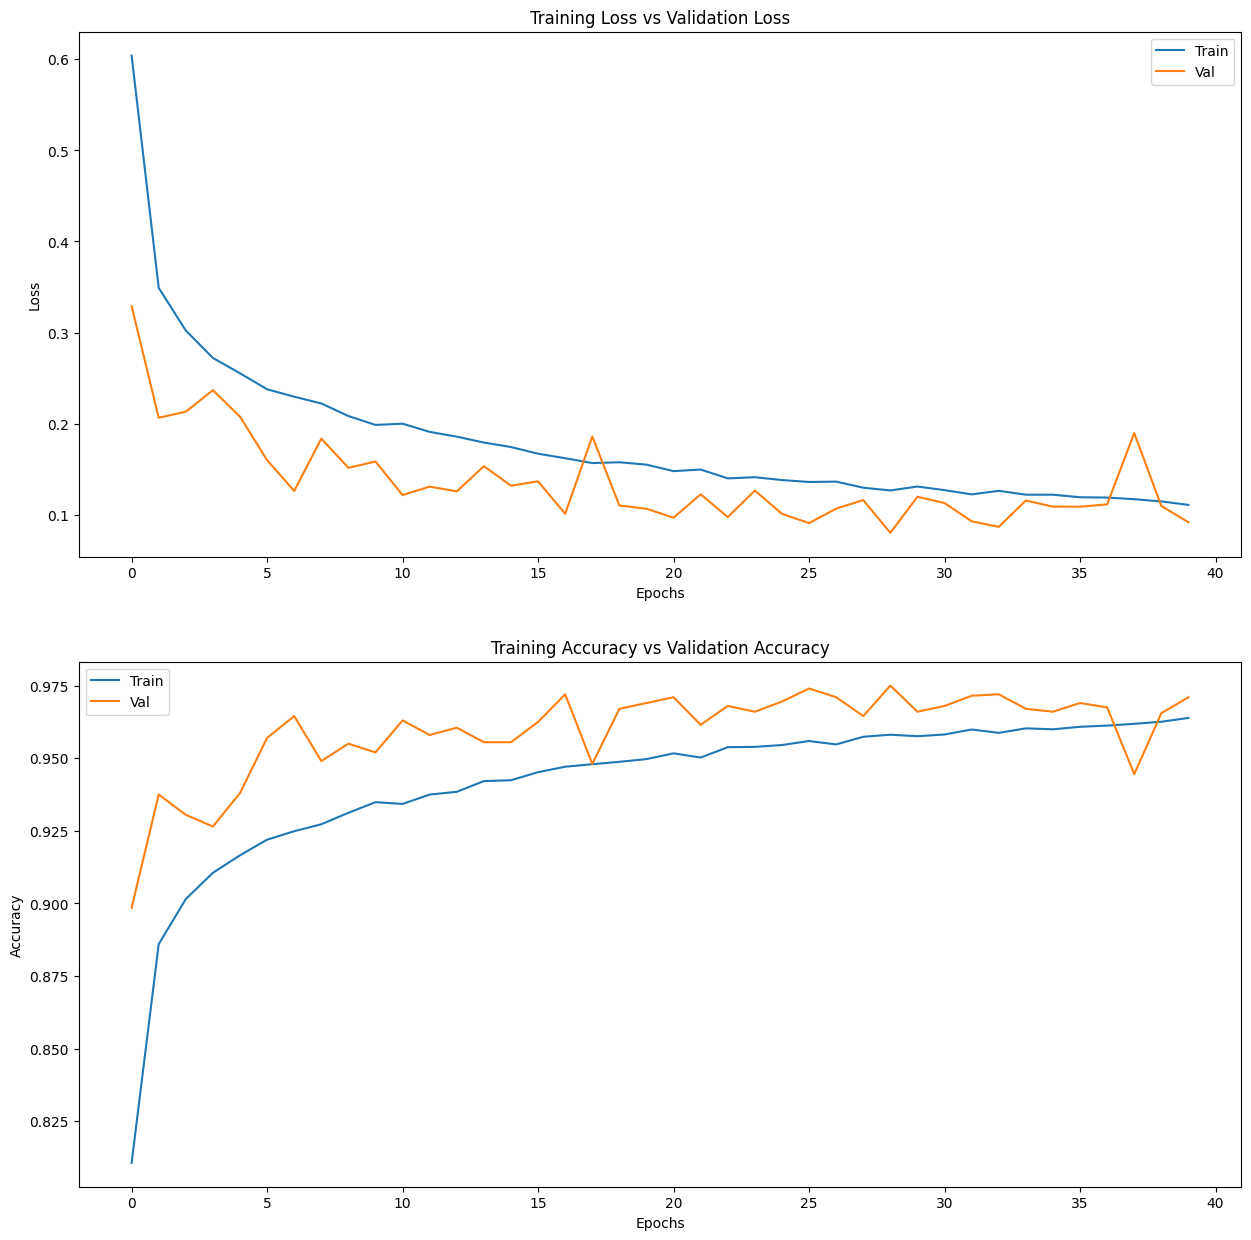

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [ ]:
head_model.evaluate(x_test, y_test)

313/313 [==============================] - 26s 83ms/step - loss: 0.1357 - accuracy: 0.9582


[0.13565513491630554, 0.9581999778747559]